In [2]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from draw import DRAW
from networks import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/Users/jucheng/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
build_encoder = Encoder(128)
build_decoder = Decoder(128)
train_iters = 2
print_iters = 100

In [4]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model_draw =  DRAW(sess, build_encoder, build_decoder, batch_size= 128, 
              read_attn = True, write_attn = True, enc_size = 128, dec_size = 128)

In [5]:
model_draw.train(load_file = 'draw_checkpoint_0.001_50000')

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [6]:
generated_images = model_draw.generate()

In [7]:
generated_images.shape

(10, 128, 784)

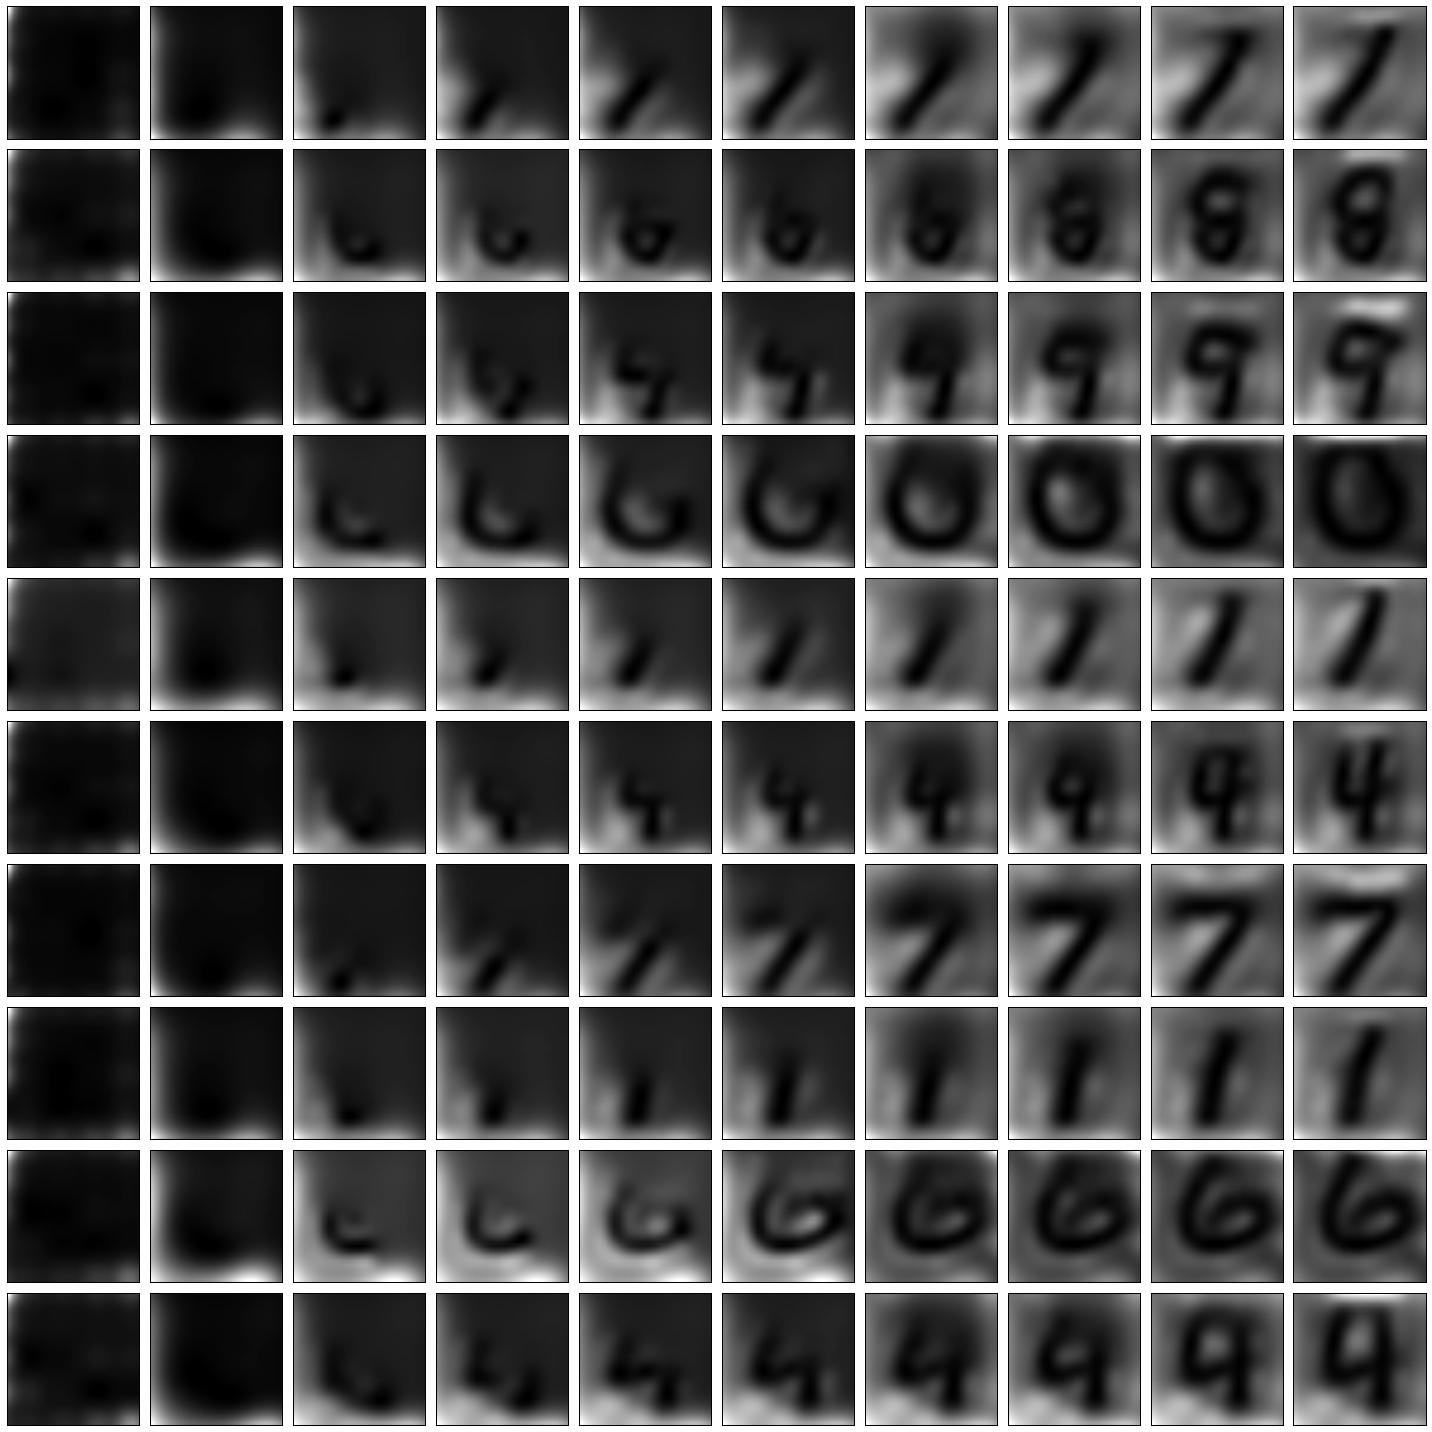

In [13]:
T = 10
num_examples = 10

plt.figure(figsize=(20,20))
for t in xrange(10):
    for n in xrange(num_examples):
        plt.subplot(num_examples, T, T* n + t + 1)
        plt.imshow(generated_images[t,n, ].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [14]:
from drawgan import DRAWGAN

In [15]:
build_encoder = Encoder(128)
build_decoder = Decoder(128)
build_discriminator = Discriminator_conv(100)
train_iters = 2
print_iters = 100

In [16]:
tf.reset_default_graph()
sess_gan = tf.InteractiveSession()
model_drawgan =  DRAWGAN(sess_gan, build_encoder, build_decoder, build_discriminator, batch_size= 128, 
              read_attn = True, write_attn = True, enc_size = 128, dec_size = 128)

In [17]:
model_drawgan.train(load_file = 'draw_gan_checkpoint_0.001_50000')

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


NotFoundError: Tensor name "D/dis_conv0/biases" not found in checkpoint files draw_gan_checkpoint_0.001_50000
	 [[Node: save/restore_slice = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/restore_slice/tensor_name, save/restore_slice/shape_and_slice)]]

Caused by op u'save/restore_slice', defined at:
  File "/Users/jucheng/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/jucheng/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 589, in launch_instance
    app.start()
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3012, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-648453e22886>", line 1, in <module>
    model_drawgan.train(load_file = 'draw_gan_checkpoint_0.001_50000')
  File "drawgan.py", line 93, in train
    self.saver = tf.train.Saver() # saves variables learned during training
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 986, in __init__
    self.build()
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1015, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 620, in build
    restore_sequentially, reshape)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 357, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 270, in restore_op
    preferred_shard=preferred_shard))
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/io_ops.py", line 204, in _restore_slice
    preferred_shard, name=name)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 359, in _restore_slice
    preferred_shard=preferred_shard, name=name)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/jucheng/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Tensor name "D/dis_conv0/biases" not found in checkpoint files draw_gan_checkpoint_0.001_50000
	 [[Node: save/restore_slice = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/restore_slice/tensor_name, save/restore_slice/shape_and_slice)]]


In [37]:
generated_images = model_drawgan.generate()
print generated_images.shape

(10, 128, 784)


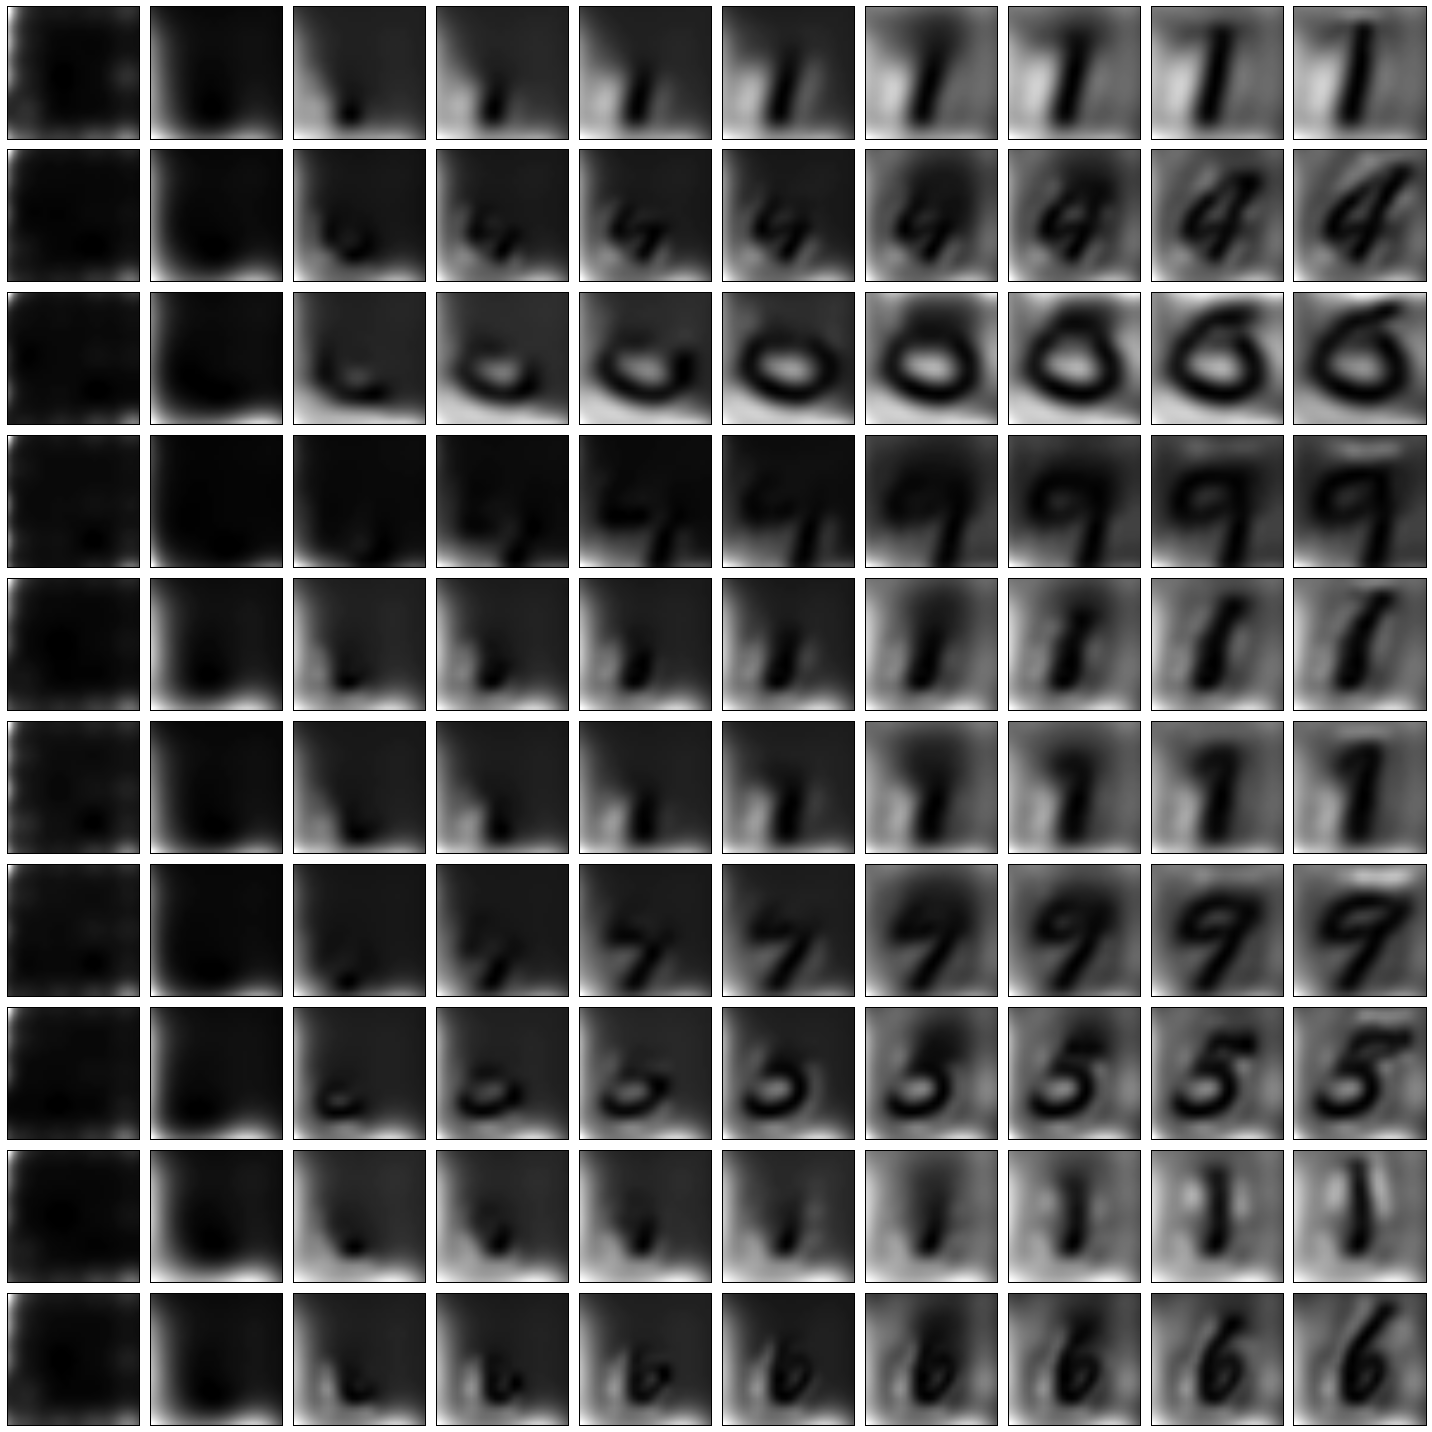

In [39]:
T = 10
num_examples = 10

plt.figure(figsize=(20,20))
for t in xrange(10):
    for n in xrange(num_examples):
        plt.subplot(num_examples, T, T* n + t + 1)
        plt.imshow(generated_images[t,n, ].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()